<a href="https://colab.research.google.com/github/kelseylieberman/Random_Assignments/blob/master/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Thursday July 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) 

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---
<a id='p1'></a>
[Back to top](#top)


### [55 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

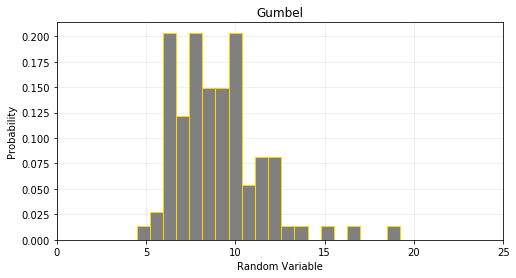

empirical mean = 8.982296367994422


In [ ]:
mu = 8
beta = 2
n_sample = 100
r = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
plt.hist(r, color="grey",ec="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('Random Variable')
ax.set_ylabel('Probability')
ax.set_title(r'Gumbel')
plt.xlim([0,25])
plt.show()

print("empirical mean = " + str(np.mean(r)))

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

$$mean = \mu + \beta\gamma$$  
$$mean = 8 + 2(0.5772156649015329) =$$ mean = **9.1544313298**
$$variance = \frac{\pi^2}{6}\beta^2$$  
$$variance = \frac{\pi^2}{6}2^2 = $$
variance = **6.57973626739**  
$$CI = \bar{x} \pm z_{0.05} \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$$
$$= \bar{x} \pm z_{0.05} \frac{8.982296367994422 - 9.1544313298}{\sqrt{6.57973626739} / 10}$$
$$CI = \bar{x} \pm z_{0.05} \sqrt{\frac{var(X)}{n}}$$
$$CI = \bar{x} \pm z_{0.05} \sqrt{\frac{6.57973626739}{100}}$$
$$CI = \bar{x} \pm 1.96*0.256509966032$$
CI = **[8.47953683457, 9.48505590142]**

In [ ]:
print(8+(2*np.euler_gamma))
print((np.pi**2)*4/6)
print((8.982296367994422 - 9.1544313298)/((6.57973626739**(1/2))*10))
x = (8.982296367994422 - 9.1544313298)/((6.57973626739**(1/2))*10)
print(stats.norm.ppf(0.025))
print(8.982296367994422 - (-1.9599639845400545*x))
print(8.982296367994422 + (-1.9599639845400545*x))
print((6.57973626739/100)**0.5)
y = (6.57973626739/100)**0.5
print(y*1.96)
print(8.982296367994422 - y*1.96)
print(8.982296367994422 + y*1.96)

9.1544313298
6.57973626739
-0.0172134961806
-1.9599639845400545
8.94855853543
9.01603420056
0.256509966032
0.502759533423
8.47953683457
9.48505590142


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

**(i)** False, because...
**(ii)** True, because this is basically the definition of a confidence interval. It is saying that 95% of CIs will contain the true mean of the whole population extrapolated from their samples. 5% of the CIs will not contain the true mean of the whole population. For a CI of 95%, 95 out of 100 should statistically contain the true mean of the population.
**(iii)** False. Confidence Intervals can be used to make statements about the mean and/or standard deviation of a data set and it's distribution, not to make statements about random variable samples from the distribution. CIs can be used to make statements about a data set as a whole (mean is a result of analyzing the whole of a data set). Any given random variable sample cannot be usefully analyzed using a CI.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

proportion covering mean: 0.646


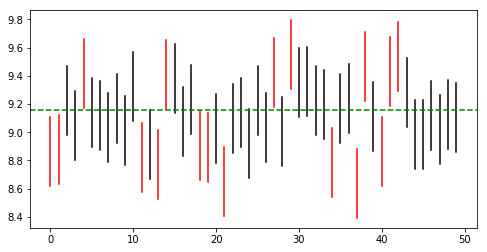

In [ ]:
def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    means = []
    Tmean = mu+beta*np.euler_gamma
    Tvar = (np.pi*beta)**2/6
    CIs = np.zeros((m,2))
    numInRange = 0
    for x in range(m):
        r = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)
        means.append(np.mean(r))
        CI66u = np.mean(r) + ((Tvar/n)**0.5)*(-1)*stats.norm.ppf((1-0.66)/2)
        CI66l = np.mean(r) - ((Tvar/n)**0.5)*(-1)*stats.norm.ppf((1-0.66)/2)
        CIs[x, 0] = CI66u
        CIs[x, 1] = CI66l
        if ((Tmean > CI66l) and (Tmean < CI66u)):
            numInRange += 1
            
    
    proportion_CIs_covering_mean = float(numInRange)/float(m)
    print("proportion covering mean: {:.3f}".format(proportion_CIs_covering_mean))
    
    A = np.random.choice(500, 50, replace=False)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    index = 0
    for i in A:
        if((Tmean <= CIs[i, 0]) and (Tmean >= CIs[i, 1])):
            plt.plot((index, index), (CIs[i, 0], CIs[i, 1]), color='black')
        else:
            plt.plot((index, index), (CIs[i, 0], CIs[i, 1]), color='red')
        index += 1
    plt.axhline(y=Tmean, linestyle='dashed', color='green')
    plt.show()
    
    
    return
    
confidence_intervals(500, 100)

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Yes, the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class because roughly 66% of the means from the 500 sammples lie within the confidence interval for the theoretical mean. So, the 66% confidence interval correctly estimates the number of trials from random samples that will fall within the range of the true mean and lie within the confidence interval. The data supports the definition of a confidence interval of 66%.

---

<a id='p2'></a>
[Back to top](#top)

### [45 points] Problem 2 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. It includes the usual 52 cards AND three special additional Octopus cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the second Octopus.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot too, using linstyles of green dashed, pink dotted, and black solid, respectively. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

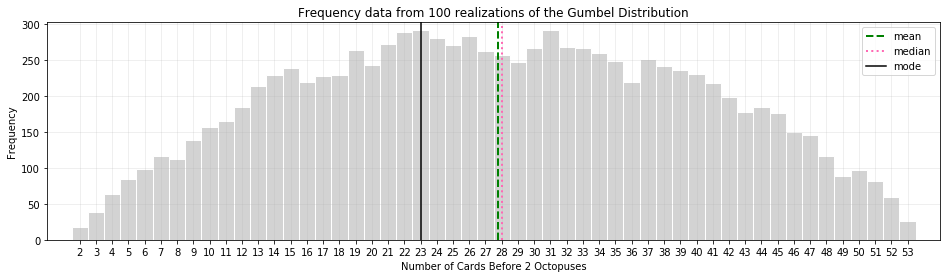

In [ ]:
def secOct(n):
    A = []
    for x in range(n):
        deck = [i for i in range(55)]
        count = 0
        numCards = 0
        while count < 2:
            card = np.random.choice(deck)
            deck.remove(card)
            numCards += 1
            if (card == 54 or card == 53 or card == 52):
                count += 1
        A.append(numCards)
    return A

fig,ax=plt.subplots(figsize=(16,4))
data = secOct(10000)
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
y, x, _  = plt.hist(data, bins=np.arange(min(data), max(data) + 1, 1)-0.5,color="lightgrey", ec='white')
ax.set_title("Frequency data from 100 realizations of the Gumbel Distribution")
ax.set_xlabel("Number of Cards Before 2 Octopuses")
ax.set_ylabel("Frequency")
plt.axis([0, 55, 0, max(y)+10])
plt.xticks(np.arange(min(data), max(data), step=1))
ax.grid(True, alpha=0.25)
plt.axvline(x=mean, linestyle='dashed', color='green', label="mean", linewidth=2)
plt.axvline(x=median, linestyle='dotted', color='hotpink', label="median", linewidth = 2)
plt.axvline(x=mode[0], linestyle='solid', color='black', label="mode")
plt.legend( ('mean', 'median', 'mode'))
        

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Oscar O'Flaherty and Octavia O'Flaherty. You prepare to take another shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

"Wider" is an odd term to use, but in general, a 99% confidence interval is wider. This means that there is a 99% chance that the data from a sample population accurately reresents the data if it were taken from the total population. I other words, a study with a 99% confidence interval is more accurate than a study with a 95% confidence interval, when it is used to represent the entire population of a study.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the _standard deviation_.
***

In [ ]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [ ]:
s = np.std(durant)
stats.norm.interval(0.95, loc=10, scale=s/(len(durant)**(1/2)))

(9.788782349882137, 10.211217650117863)

**Part D**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

I would rather have a low Type II error rate. A Type I error is rejecting the Null Hypothesis when the Null is true. In this case the Null hypothesis is that the strength of the carbon is at or above tolerance. Accidentally rejecting carbon fiber that is at or above tolerance is probably costly and unfortunate, but won't result in any safety issues. A Type II error means failing to reject the Null Hypothesis when the Null is false. In this case that would mean failing to reject pieces of carbon fiber that are not above tolerance, or accepting pieces of carbon fiber that are below tolerance. This could cauuse safety and/or reliability issues with the airplanes, so I would want a very low Type II error rate. 

**Part E**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Stella O'Flaherty. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. O'Flaherty suggests that you do the following CSCI3022 problem:</font>

You measure 53 suckers from baby reef octopuses and find that they are, on average, 45.2 mm wide, with a standard devaition of 30.4mm. 

Then you measure 41 suckers from from baby dumbo octopuses and find that they are, on average, 52.8 mm wide, with a standard deviation of 22.8 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm?  Use a test of your choice.

***

In [ ]:
1 - stats.t.cdf(1.505, 92) #to get t-table value.

0.0678748304025053

$$n_r = 53, \bar{x}_r = 45.2, s_r = 30.4$$
$$n_d = 41, \bar{x}_d = 52.8, s_d = 22.8$$

$H_0$: $\mu_d - \mu_r <= 6$  
$H_1$: $\mu_d - \mu_r > 6$  
t-test.  
$t = \frac{(\bar{x_d} - \bar{x_r}) - (\mu_d - \mu_r)}{\sqrt{\frac{s_d}{n_d}+\frac{s_r}{n_r}}}$  
$t = \frac{(52.8 - 45.2) - (6)}{\sqrt{\frac{22.8}{41}+\frac{30.4}{53}}}$  
$t = \frac{(1.6)}{\sqrt{0.556+0.574}}$  
$t = \frac{(1.6)}{1.063}$  
$t = 1.505$  

Degrees of Freedom, df = $n_r + n_d - 2$ = $53+41-2$ = 92.  
p-value = t-table(t, df) = t-table(1.505, 92) = 0.0679  
p = 0.0679 > $\alpha = 0.05$  
Since p is greater than $\alpha$, we fail to reject the Null Hypothesis and therefore there is not statistical evidence at the 0.05 significance level that the true mean od baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm
